In [2]:
!pip install mysql-connector
!pip install --upgrade mysql-connector-python

In [4]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Marella@2001",
    database = "MobilePhones",
    auth_plugin = 'mysql_native_password'
)

mycursor = db.cursor()
print(db)

In [372]:
mycursor.execute("Select*from Phones_Spec")
output = mycursor.fetchall()

for x in output:
    print(x)

(1, 'Samsung', 'Galaxy F14 4G', 'Android 14', 'Qualcomm Snapdragon 680', 4, 64, 'FHD+', 13.0, 50, 'Moonlight silver', 5000, 25, 8999.0, 0)
(2, 'Samsung', 'Galaxy M35 5G', 'Android 14', 'Exynos 1380(5 nm)', 6, 128, 'Super AMOLED', 13.0, 50, 'Moonlight Blue', 6000, 25, 19999.0, 1)
(3, 'Samsung', 'Galaxy Z Fold 6', 'Android 14', 'Qualcomm Snapdragon 6 Gen3(4nm)', 12, 256, 'AMOLED 2X', 10.0, 50, 'Navy', 4000, 25, 164999.0, 4)
(4, 'Samsung', 'Galaxy Z Flip 6', 'Android 14', 'Qualcomm Snapdragon 8 Gen3(4nm)', 12, 256, 'AMOLED 2X', 10.0, 50, 'Silver Shadow', 4000, 25, 109999.0, 4)
(5, 'Samsung', 'Galaxy F55 5G', 'Android 14', 'Qualcomm Snapdragon 7 Gen1(4nm)', 8, 128, 'Super AMOLED Plus', 50.0, 50, 'Raisin Black', 5000, 45, 26999.0, 2)
(6, 'Samsung', 'Galaxy M15 5G', 'Android 14', 'MediaTek Dimensity 6100+', 4, 128, 'sAMOLED', 13.0, 50, 'Blue Topaz', 6000, 25, 13299.0, 0)
(7, 'Samsung', 'Galaxy M55 5G', 'Android 14', 'Qualcomm SM7450', 8, 128, 'AMOLED', 50.0, 50, 'Light Green', 5000, 45, 2699

In [374]:
query = "select*from Phones_Spec"
df = pd.read_sql(query,db)

C:\Users\marel\AppData\Local\Temp\ipykernel_7440\3534907585.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,db)


In [376]:
df.head()

,Id,PhoneName,Model,OperatingSystem,Processor,RAM_in_GB,ROM_in_GB,Display,FrontCamera_in_MP,PrimaryCamera_in_MP,Color,Battery_in_mAh,Charger_in_volt,Price,Segments
0,1,Samsung,Galaxy F14 4G,Android 14,Qualcomm Snapdragon 680,4,64.0,FHD+,13.0,50,Moonlight silver,5000.0,25.0,8999.0,0
1,2,Samsung,Galaxy M35 5G,Android 14,Exynos 1380(5 nm),6,128.0,Super AMOLED,13.0,50,Moonlight Blue,6000.0,25.0,19999.0,1
2,3,Samsung,Galaxy Z Fold 6,Android 14,Qualcomm Snapdragon 6 Gen3(4nm),12,256.0,AMOLED 2X,10.0,50,Navy,4000.0,25.0,164999.0,4
3,4,Samsung,Galaxy Z Flip 6,Android 14,Qualcomm Snapdragon 8 Gen3(4nm),12,256.0,AMOLED 2X,10.0,50,Silver Shadow,4000.0,25.0,109999.0,4
4,5,Samsung,Galaxy F55 5G,Android 14,Qualcomm Snapdragon 7 Gen1(4nm),8,128.0,Super AMOLED Plus,50.0,50,Raisin Black,5000.0,45.0,26999.0,2


In [378]:
df.shape

(1044, 15)

In [380]:
df2=pd.read_csv(r"S:\Mobiles_Specifications.csv")

In [382]:
df2.head()

,PhoneName,Manuf_country
0,Samsung,South Korea
1,Apple,USA
2,Nokia,Finnish
3,Google,Taiwan
4,Vivo,China


In [384]:
df_merged=pd.merge(df,df2, on=['PhoneName'],how='left') # To merge two tables base on columns

In [386]:
df_merged.head()

,Id,PhoneName,Model,OperatingSystem,Processor,RAM_in_GB,ROM_in_GB,Display,FrontCamera_in_MP,PrimaryCamera_in_MP,Color,Battery_in_mAh,Charger_in_volt,Price,Segments,Manuf_country
0,1,Samsung,Galaxy F14 4G,Android 14,Qualcomm Snapdragon 680,4,64.0,FHD+,13.0,50,Moonlight silver,5000.0,25.0,8999.0,0,South Korea
1,2,Samsung,Galaxy M35 5G,Android 14,Exynos 1380(5 nm),6,128.0,Super AMOLED,13.0,50,Moonlight Blue,6000.0,25.0,19999.0,1,South Korea
2,3,Samsung,Galaxy Z Fold 6,Android 14,Qualcomm Snapdragon 6 Gen3(4nm),12,256.0,AMOLED 2X,10.0,50,Navy,4000.0,25.0,164999.0,4,South Korea
3,4,Samsung,Galaxy Z Flip 6,Android 14,Qualcomm Snapdragon 8 Gen3(4nm),12,256.0,AMOLED 2X,10.0,50,Silver Shadow,4000.0,25.0,109999.0,4,South Korea
4,5,Samsung,Galaxy F55 5G,Android 14,Qualcomm Snapdragon 7 Gen1(4nm),8,128.0,Super AMOLED Plus,50.0,50,Raisin Black,5000.0,45.0,26999.0,2,South Korea


In [388]:
df_merged.shape

(1044, 16)

In [390]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1044 non-null   int64  
 1   PhoneName            1044 non-null   object 
 2   Model                1044 non-null   object 
 3   OperatingSystem      1044 non-null   object 
 4   Processor            1044 non-null   object 
 5   RAM_in_GB            1044 non-null   int64  
 6   ROM_in_GB            1037 non-null   float64
 7   Display              1044 non-null   object 
 8   FrontCamera_in_MP    1044 non-null   float64
 9   PrimaryCamera_in_MP  1044 non-null   int64  
 10  Color                1044 non-null   object 
 11  Battery_in_mAh       1037 non-null   float64
 12  Charger_in_volt      1039 non-null   float64
 13  Price                1032 non-null   float64
 14  Segments             1044 non-null   int64  
 15  Manuf_country        1044 non-null   o

In [392]:
df_merged.describe()

,Id,RAM_in_GB,ROM_in_GB,FrontCamera_in_MP,PrimaryCamera_in_MP,Battery_in_mAh,Charger_in_volt,Price,Segments
count,1044.000000,1044.000000,1037.000000,1044.000000,1044.000000,1037.000000,1039.000000,1032.000000,1044.000000
mean,522.500000,5.902299,130.847637,15.708525,36.819923,4257.126326,26.620789,44791.918605,1.607280
std,301.521144,2.907001,93.607256,13.063008,27.078738,1016.813480,17.585480,61163.683675,1.311862
min,1.000000,1.000000,8.000000,0.300000,5.000000,1440.000000,2.000000,1300.000000,0.000000
25%,261.750000,4.000000,64.000000,8.000000,12.000000,3500.000000,15.000000,14567.000000,0.000000
50%,522.500000,6.000000,128.000000,10.800000,48.000000,4500.000000,18.000000,27000.000000,2.000000
75%,783.250000,8.000000,128.000000,16.000000,50.000000,5000.000000,27.000000,53624.750000,3.000000
max,1044.000000,16.000000,512.000000,50.000000,200.000000,6000.000000,120.000000,749000.000000,4.000000


In [394]:
df_merged.nunique()

Id                     1044
PhoneName                 6
Model                   290
OperatingSystem          26
Processor               146
RAM_in_GB                 8
ROM_in_GB                 8
Display                  38
FrontCamera_in_MP        25
PrimaryCamera_in_MP      11
Color                   337
Battery_in_mAh           87
Charger_in_volt          18
Price                   259
Segments                  5
Manuf_country             6
dtype: int64

In [396]:
df_merged.isnull().sum()

Id                      0
PhoneName               0
Model                   0
OperatingSystem         0
Processor               0
RAM_in_GB               0
ROM_in_GB               7
Display                 0
FrontCamera_in_MP       0
PrimaryCamera_in_MP     0
Color                   0
Battery_in_mAh          7
Charger_in_volt         5
Price                  12
Segments                0
Manuf_country           0
dtype: int64

In [398]:
# To check the columns which have null values more than 10 
columns=df_merged.columns
[x for x in columns if df_merged[x].isnull().sum()>10]

['Price']

In [400]:
# To find the mode of the columns where the null values are preseu
mode_rom=df_merged['ROM_in_GB'].mode()[0]
mode_battery=df_merged['Battery_in_mAh'].mode()[0]
mode_price=df_merged['Price'].mode()[0]

In [402]:
mode_rom

128.0

In [404]:
mode_battery

5000.0

In [406]:
mode_price

12499.0

In [408]:
# Filling all the null values using fillna() method

df_merged['ROM_in_GB']=df_merged['ROM_in_GB'].fillna(mode_rom)

In [410]:
df_merged['Battery_in_mAh']=df_merged['Battery_in_mAh'].fillna(mode_battery)
df_merged['Price']=df_merged['Price'].fillna(mode_price)

In [412]:
mode_charger=df_merged['Charger_in_volt'].mode()[0]
mode_charger

15.0

In [414]:
df_merged['Charger_in_volt']=df_merged['Charger_in_volt'].fillna(mode_charger)

In [416]:
df_merged.isnull().sum()

Id                     0
PhoneName              0
Model                  0
OperatingSystem        0
Processor              0
RAM_in_GB              0
ROM_in_GB              0
Display                0
FrontCamera_in_MP      0
PrimaryCamera_in_MP    0
Color                  0
Battery_in_mAh         0
Charger_in_volt        0
Price                  0
Segments               0
Manuf_country          0
dtype: int64

In [418]:
# checking whether duplicates are available are not
df_merged.duplicated().sum()

0

In [420]:
# Since there are no null values and duplicate values we can dive deep into the data...

<Axes: xlabel='Price'>

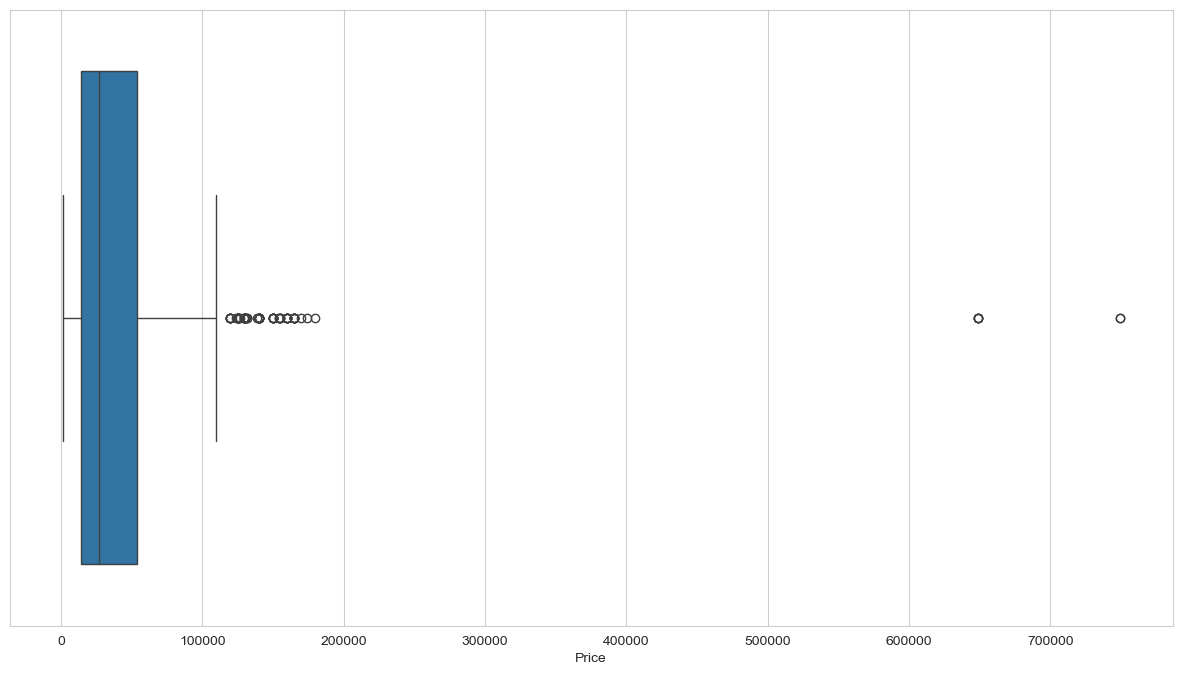

In [422]:
# Box plot to check whether dataset has outliers are not
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.boxplot(df_merged,x='Price')

Observation : In the 'Price' column there are some outliers.So,we can replace the outliers with mode or median
              but if the outliers are minimal we can drop the outliers and it will not affect the dataset.

In [425]:
df_merged[['PhoneName','Model','Price']].sort_values(by='Price',ascending=False).head(10)

,PhoneName,Model,Price
360,Apple,iphone 13 Mini,749000.0
397,Apple,iphone 13 Mini,749000.0
441,Apple,iphone 13 Mini,649000.0
442,Apple,iphone 13 Mini,649000.0
443,Apple,iphone 13 Mini,649000.0
323,Apple,iphone 13 Mini,649000.0
387,Apple,iphone 14 Pro Max,179900.0
382,Apple,iphone 15 Pro Max,174000.0
390,Apple,iphone 13 Pro Max,169900.0
96,Samsung,Galaxy Z Fold 6,164999.0


In [427]:
# we have less number of outliers so we can drop those outliers, so thet the dataset will not get affect by outliers

In [429]:
df_merged.drop(360,axis=0,inplace=True)

In [431]:
df_merged.drop(397,axis=0,inplace=True)
df_merged.drop(441,axis=0,inplace=True)
df_merged.drop(442,axis=0,inplace=True)
df_merged.drop(443,axis=0,inplace=True)
df_merged.drop(323,axis=0,inplace=True)

In [433]:
# Top 10 mobiles based on price
df_merged[['PhoneName','Model','Price']].sort_values(by='Price',ascending=False).head(10)

,PhoneName,Model,Price
387,Apple,iphone 14 Pro Max,179900.0
382,Apple,iphone 15 Pro Max,174000.0
390,Apple,iphone 13 Pro Max,169900.0
190,Samsung,Galaxy Z Fold 6,164999.0
278,Samsung,Galaxy Z Fold 6,164999.0
277,Samsung,Galaxy Z Fold 6,164999.0
96,Samsung,Galaxy Z Fold 6,164999.0
280,Samsung,Galaxy Z Flip 6,164999.0
279,Samsung,Galaxy Z Flip 6,164999.0
2,Samsung,Galaxy Z Fold 6,164999.0


In [435]:
# least 10 mobiles based on price
df_merged[['PhoneName','Model','Price']].sort_values(by='Price',ascending=True).head(10)

,PhoneName,Model,Price
793,Vivo,Y20G,1300.0
505,Nokia,C12,5999.0
480,Nokia,C01 Plus,5999.0
481,Nokia,C12,5999.0
504,Nokia,C12,5999.0
503,Nokia,C01 Plus,5999.0
581,Nokia,2,6790.0
580,Nokia,2,6790.0
579,Nokia,2,6790.0
478,Nokia,2.2,6999.0


In [521]:
df_merged['Color'].value_counts().head(5) # top 5 mobiles colors with count values

Color
Black     71
White     45
Blue      39
Gold      31
Silver    29
Name: count, dtype: int64

In [523]:
df_merged['Color'].value_counts().head(5).index.tolist() # top 5 mobiles colors without count values

['Black', 'White', 'Blue', 'Gold', 'Silver']

## Visualization

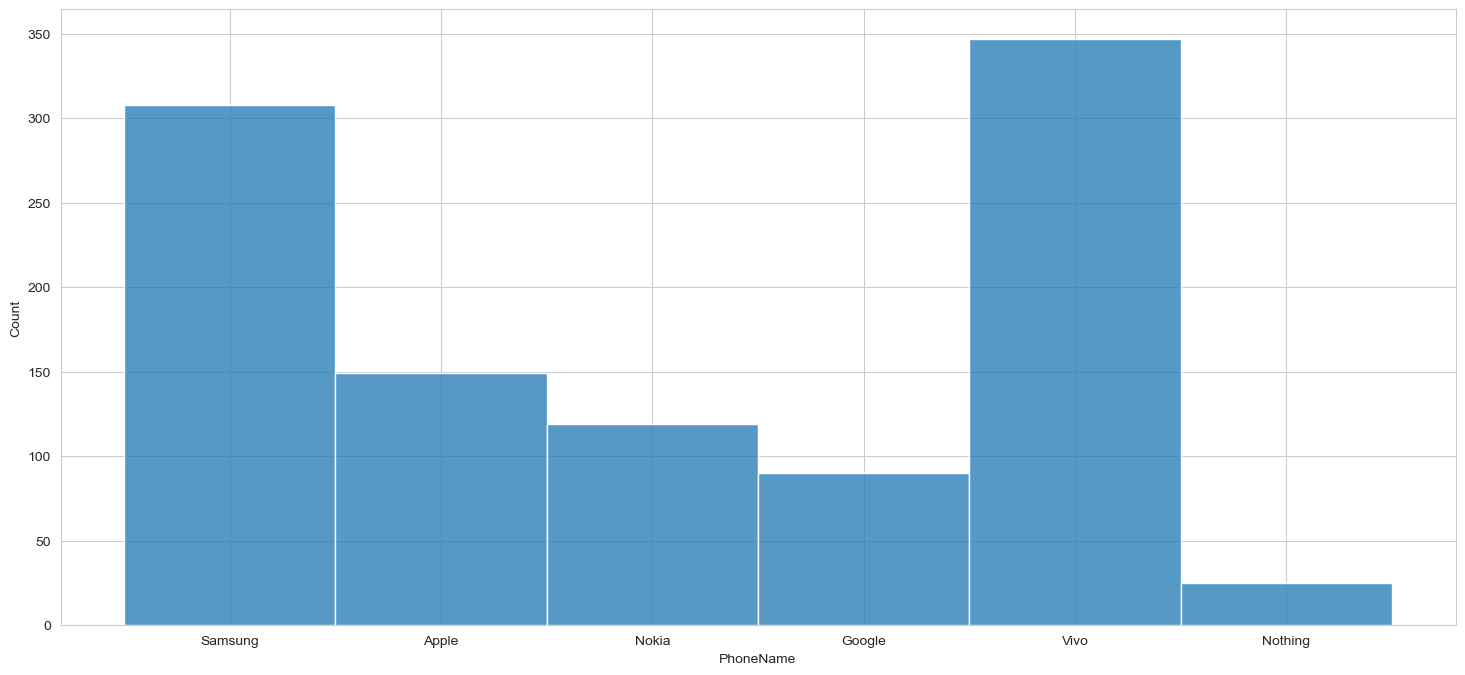

In [440]:
# Let us visualize the distribution of data
plt.figure(figsize=(18,8))
sns.histplot(df_merged,x='PhoneName',element='bars')
plt.show()

Observation : Here, in this data set Vivo is the brand which has more number of mobiles.

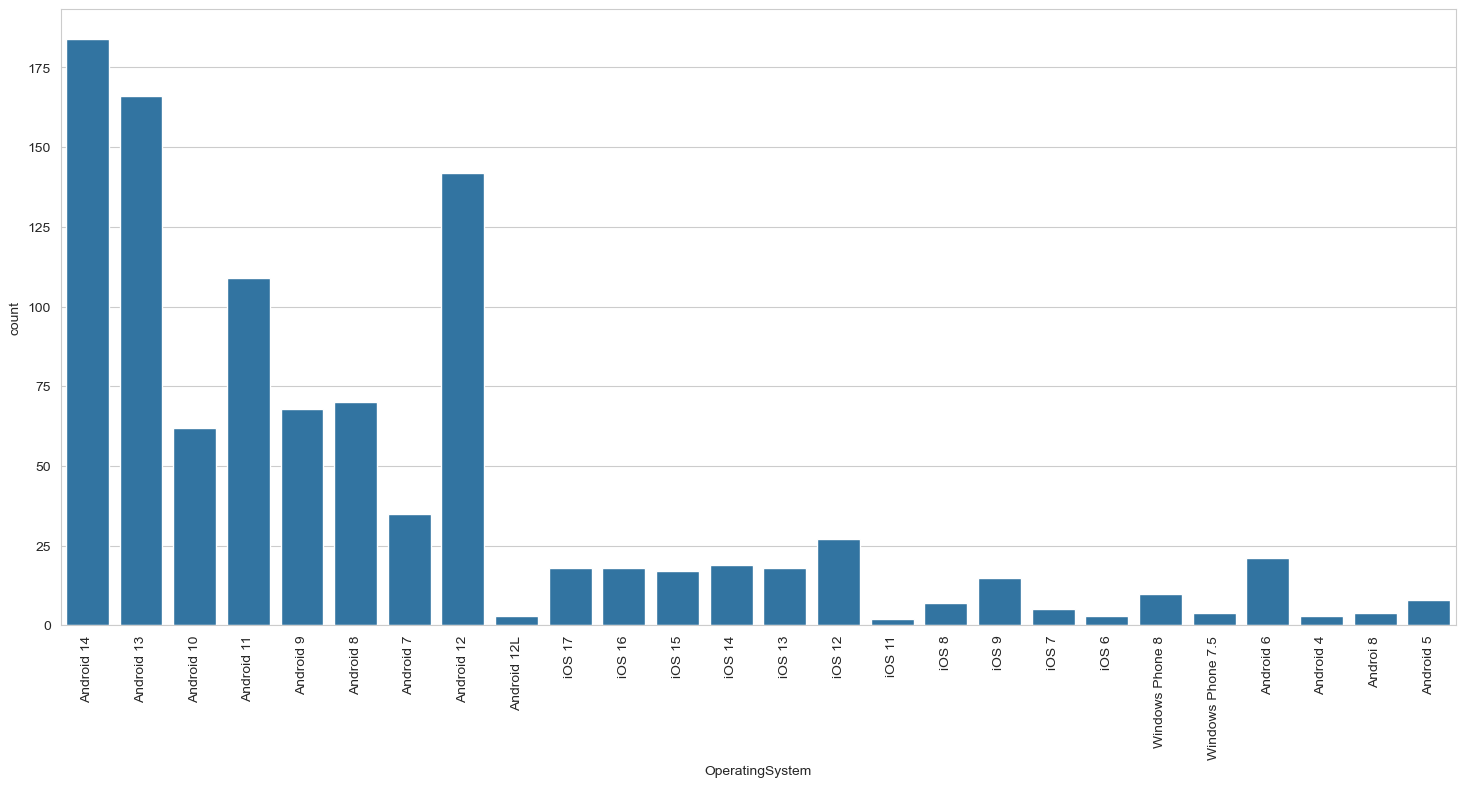

In [462]:
# Let us visualize the distribution of data
plt.figure(figsize=(18,8))
sns.countplot(df_merged,x='OperatingSystem')
plt.xticks(rotation=90)
plt.show()

Observation : From the above plot, we can say that most of the mobiles have the Android 14 and Android 13 Operating System.

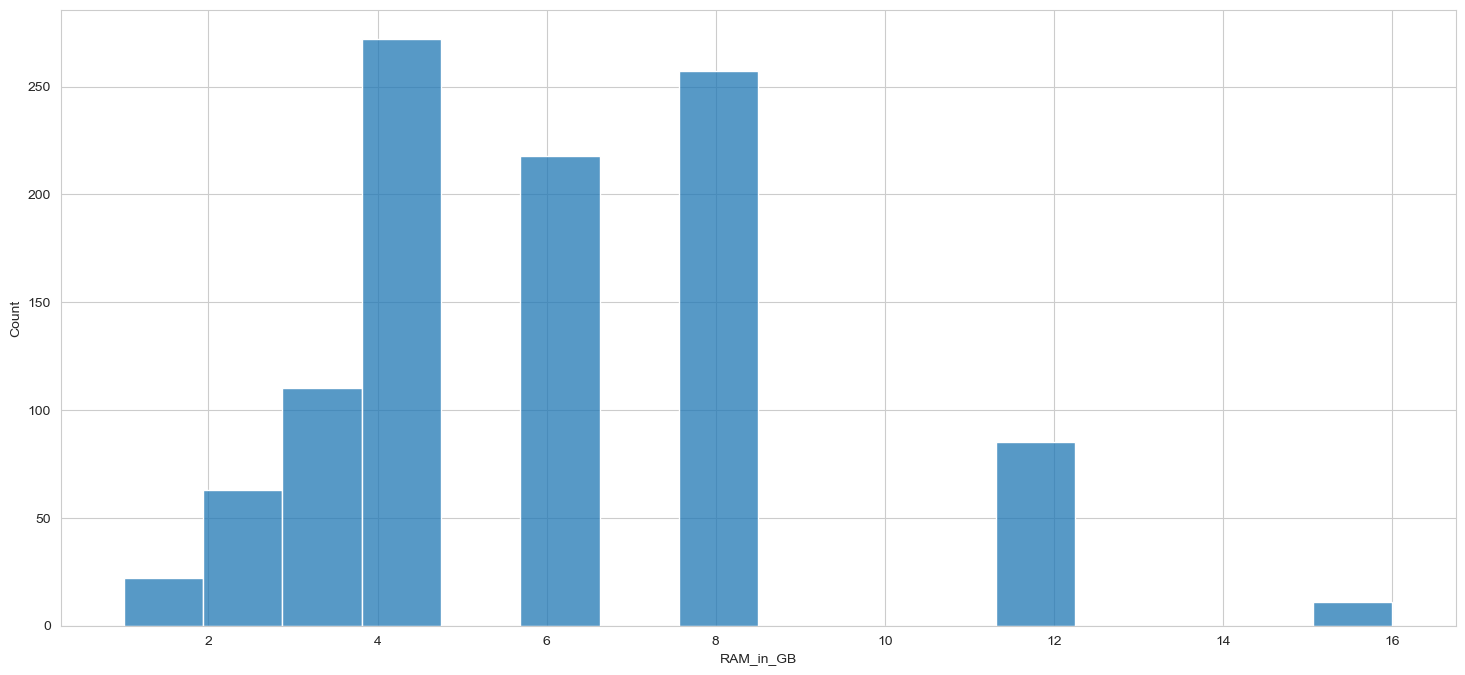

In [445]:
# distribution of phones based on the ram of mobiles
plt.figure(figsize=(18,8))
sns.histplot(df_merged,x='RAM_in_GB',stat='count',bins=16)
plt.show()

Observation : This plot is clearly showing that samsung mobiles price starts at 

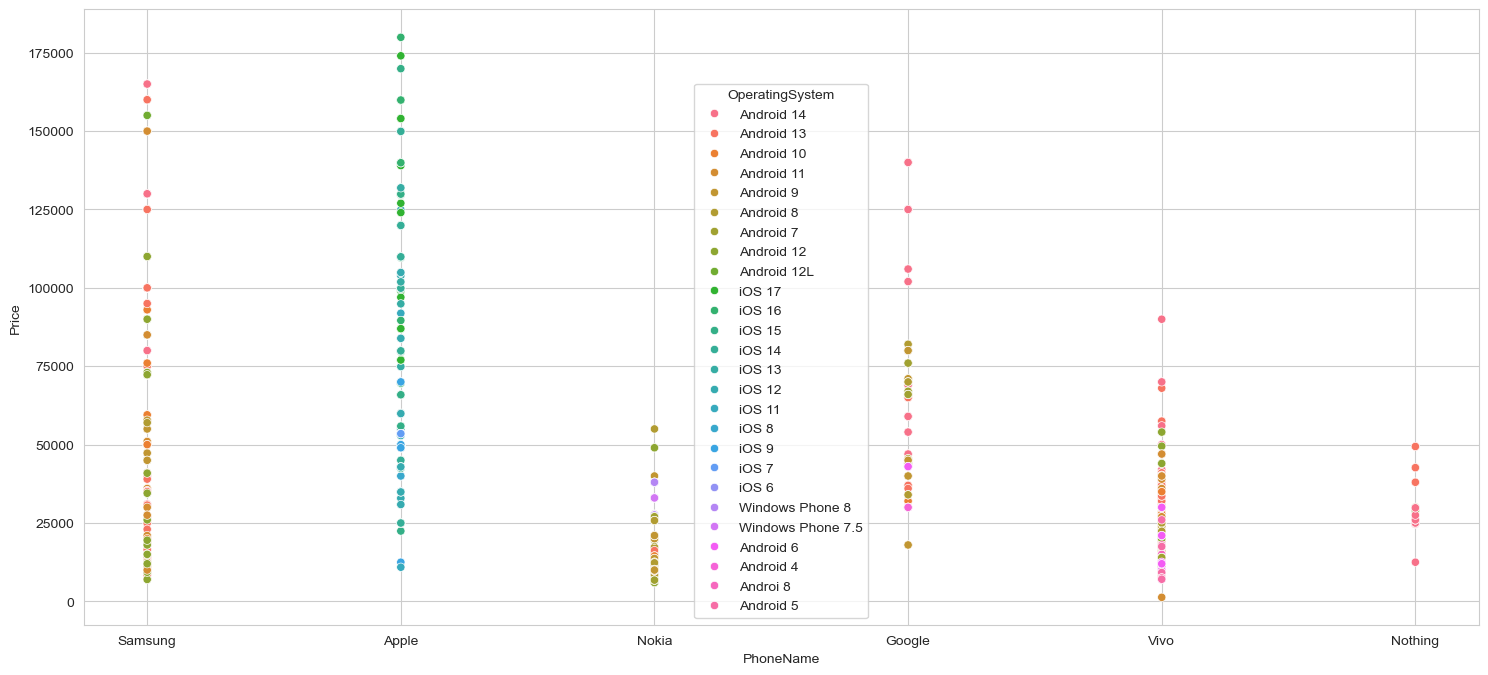

In [443]:
plt.figure(figsize=(18,8))
sns.scatterplot(df_merged,x='PhoneName',y='Price',hue='OperatingSystem')
plt.show()

Observation : From this plot we can analize that 4GB and 8GB ram phones are more compared to other.

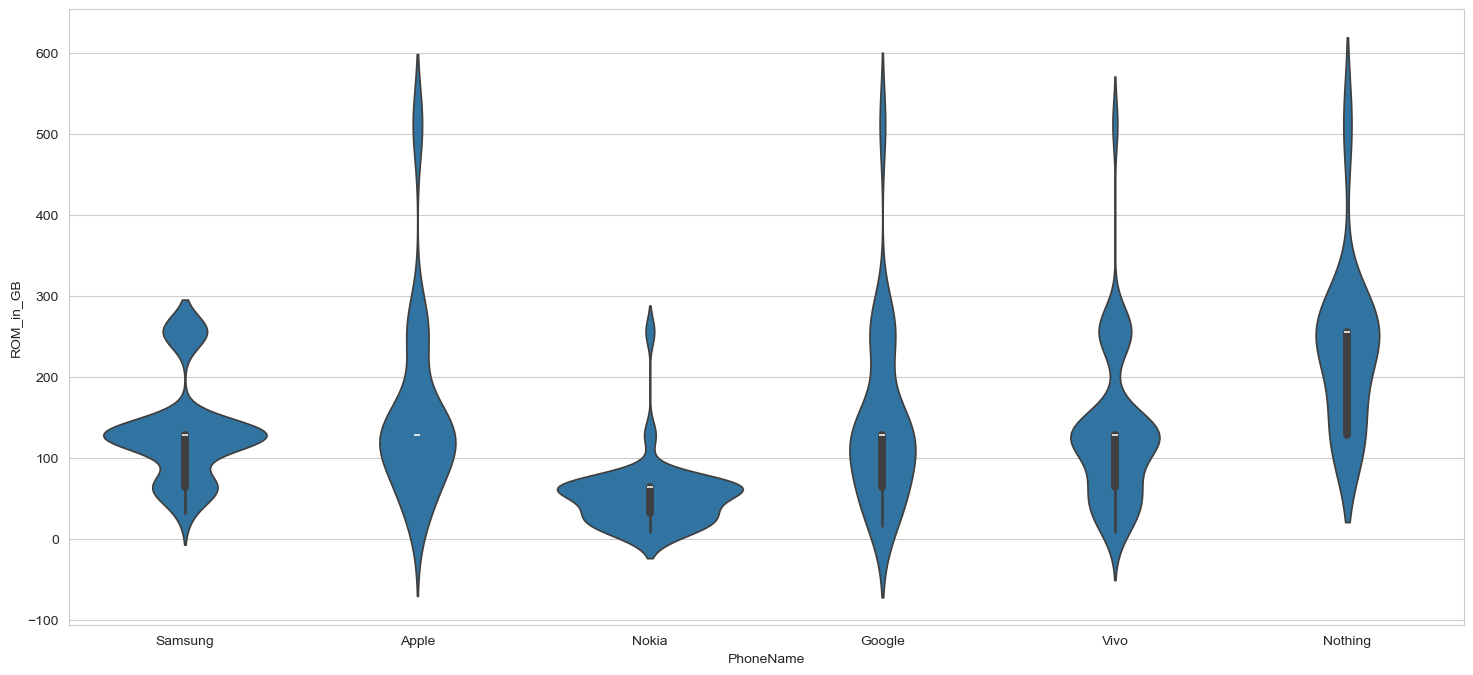

In [448]:

plt.figure(figsize=(18,8))
sns.violinplot(df_merged,x='PhoneName',y='ROM_in_GB')
plt.show()

<Axes: >

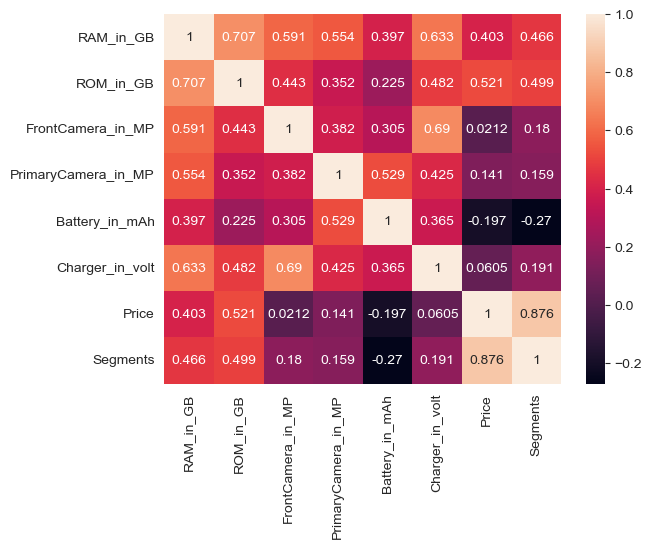

In [450]:
corr=df_merged[['RAM_in_GB','ROM_in_GB','FrontCamera_in_MP','PrimaryCamera_in_MP','Battery_in_mAh','Charger_in_volt','Price','Segments']].corr()
sns.heatmap(corr,annot=True,fmt='.3g')

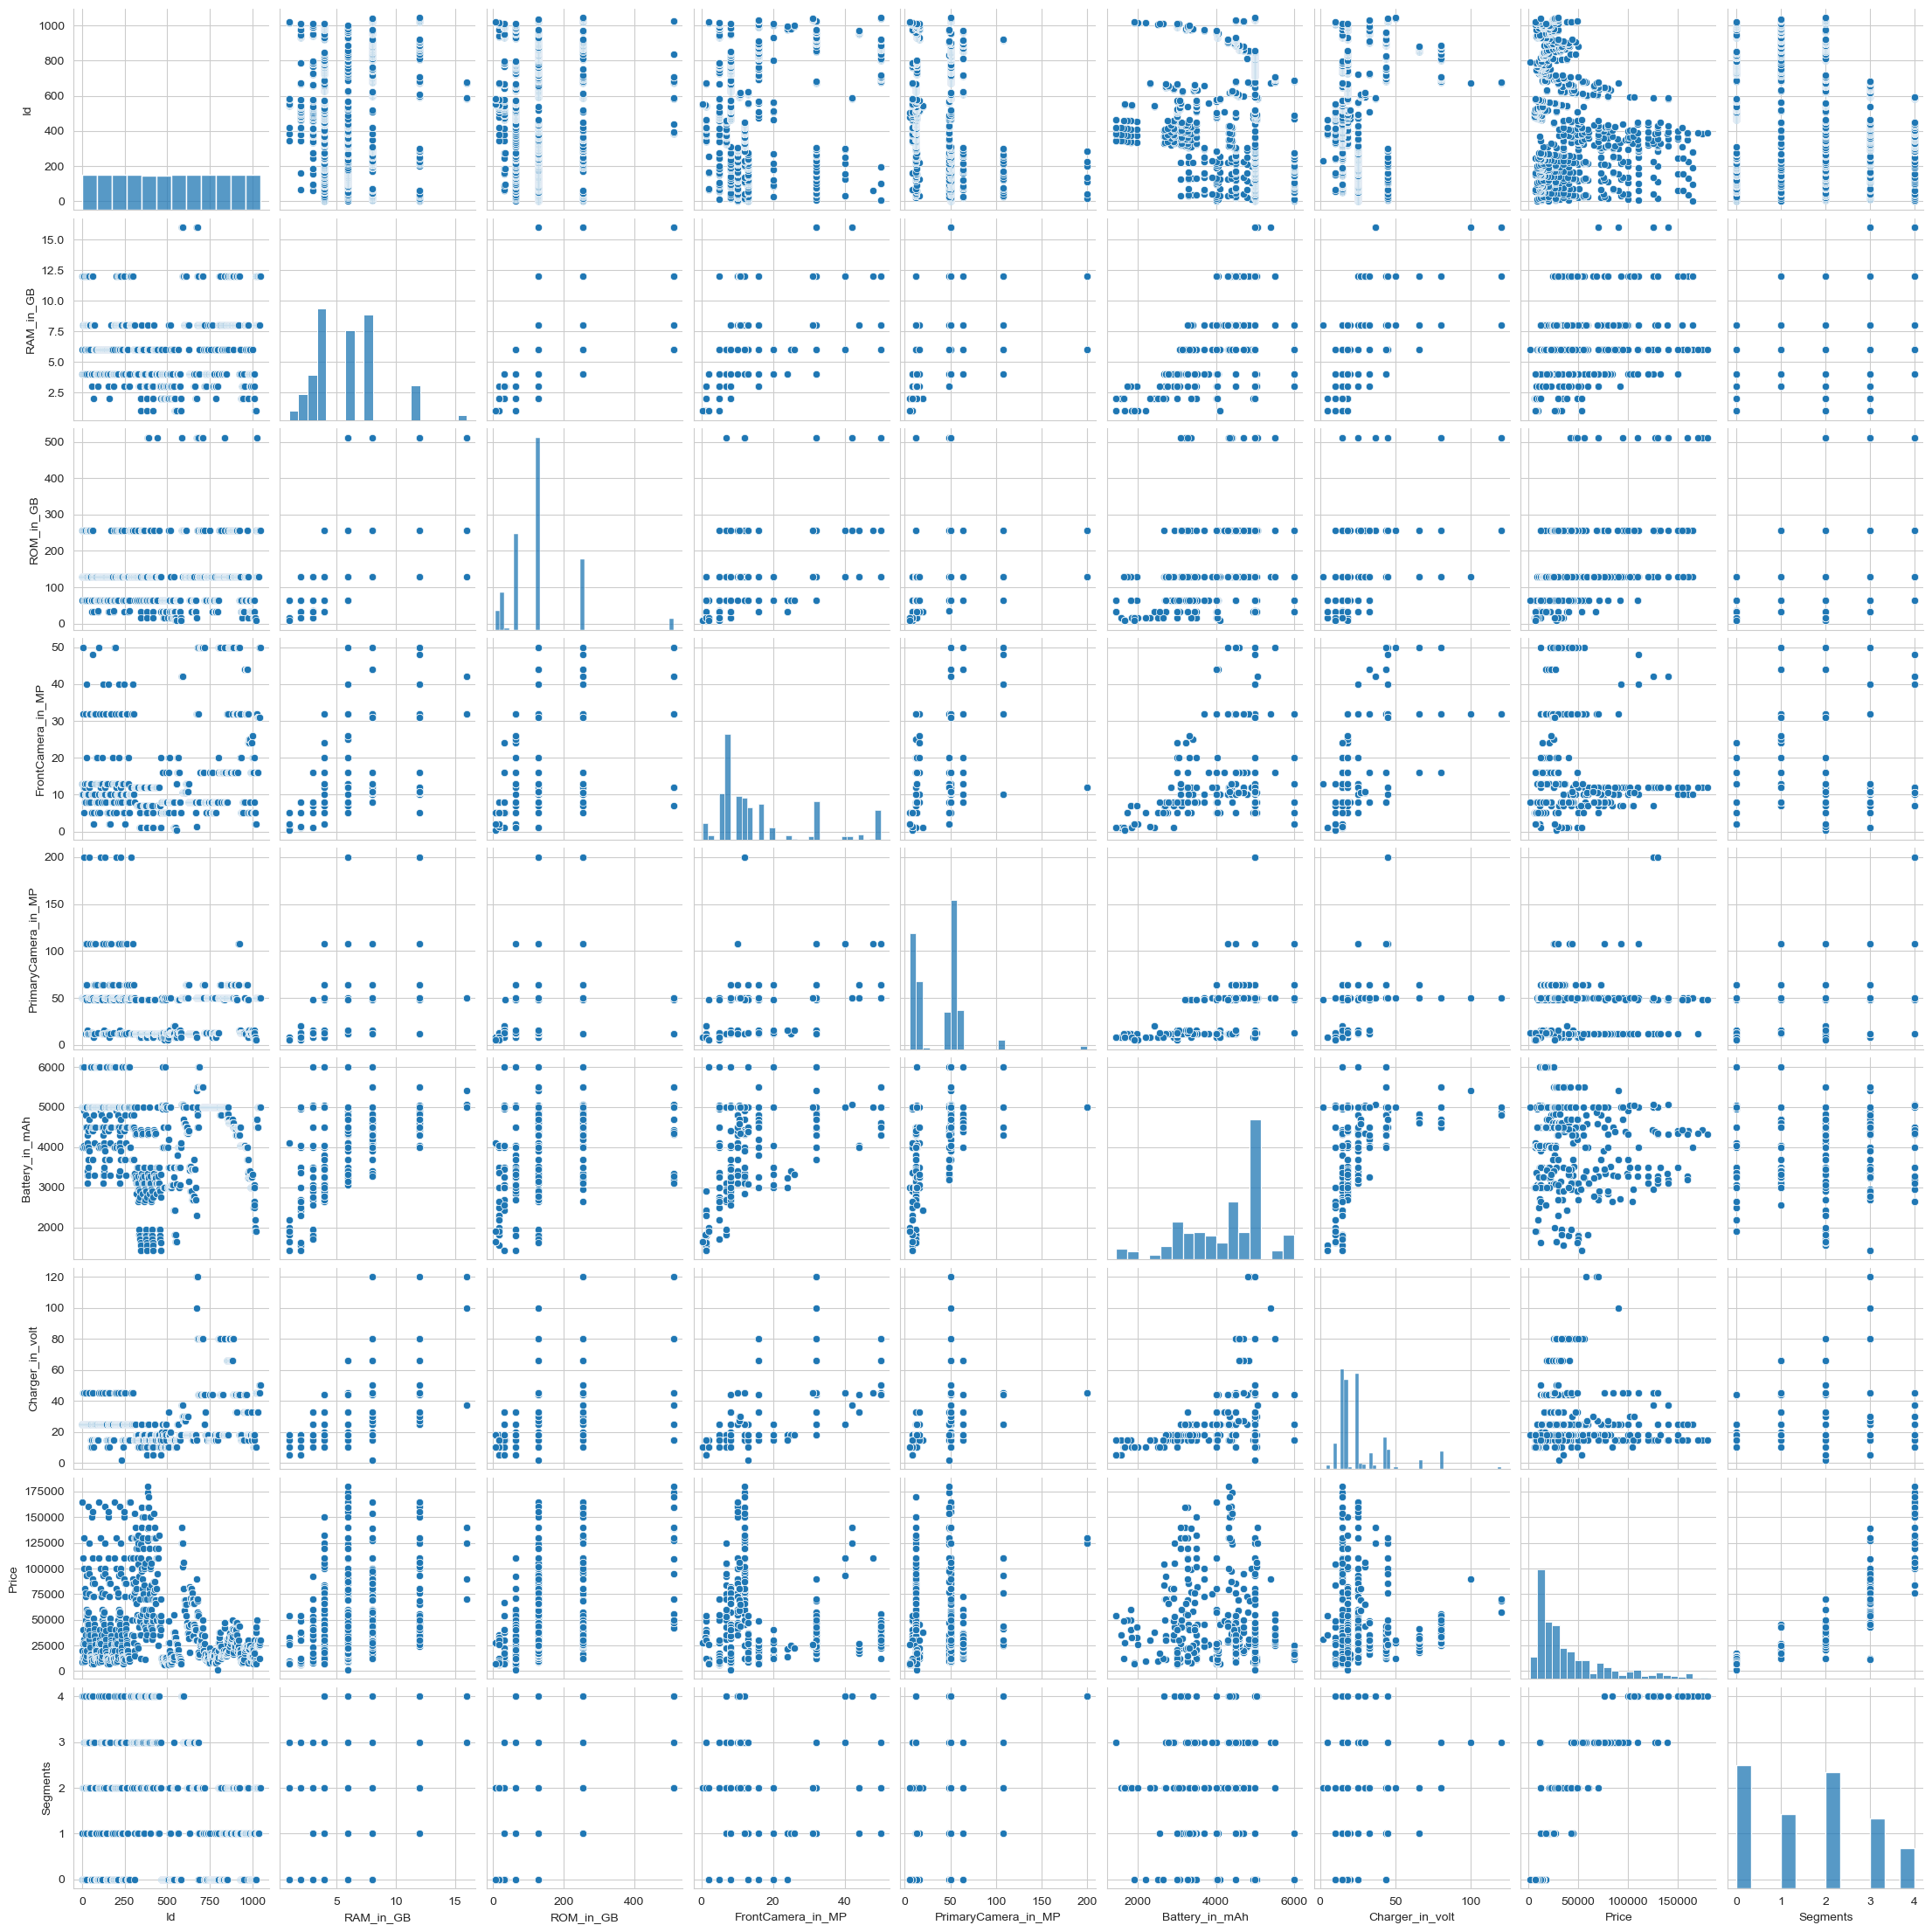

In [140]:
sns.pairplot(df_merged)